<a href="https://colab.research.google.com/github/vanivaranya/fetal-health-classification/blob/main/23471_Vani_Varanya_MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/fetal_health.csv')

In [ ]:
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


Question 1: Are there any missing values in the CTG features dataset? How should these missing values be handled?

In [ ]:
data.isna()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

After using the above functions we can see there are no missing values in the CTG features dataset. So there is no NaN value to be handled, but if there were we would have to use .fillna() function and set some desired value.

Question 2: Are there any duplicate entries in the dataset that need to be identified and removed?

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Length: 2126, dtype: bool

In [ ]:
data.duplicated().sum()

13

In [ ]:
data.drop_duplicates()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


Yes, there are 13 duplicate entries in the dataset which can be identified by .duplicated() and they can be removed by .drop_duplicates().

Question 3: Are there any inconsistent or incorrect data entries that need to be corrected or standardized?

In [ ]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
data.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [ ]:
bv=data['baseline value'].unique()
bv.sort()
bv

array([106., 110., 112., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 151., 152., 154., 156.,
       157., 158., 159., 160.])

Yes, there are a few inconsistent data entries. First we can check the first 5 rows by .head(), to check for any inconsistent or incorrect data entries. We see that we can sort by the baseline value column using .sort() (as it's the most important one in the data set). If we had any column of string datatype (by checking .dtypes), we could have used lowercase, strip and fuzzywuzzy functions too.

Question 4: How can we visualize the distribution of CTG features across the three fetal health states?

In [ ]:
data['fetal_health'].unique()

array([2., 1., 3.])

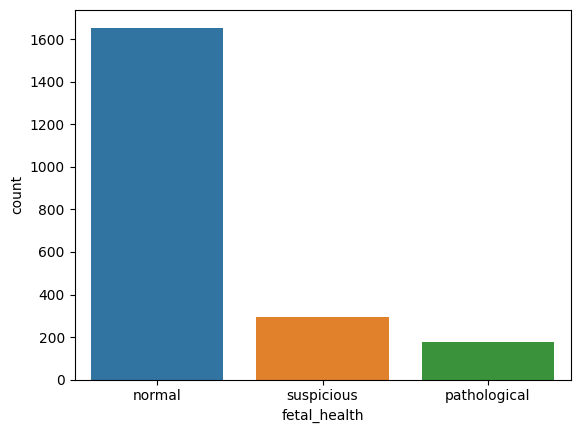

In [ ]:
ax=sns.countplot(data, x="fetal_health")
labels = {1:'normal', 2:'suspicious', 3:'pathological'}
ax.set_xticklabels(list(labels.values()))
plt.show()

We can visualize the distribution of CTG features across the three fetal health states (also known as normal, suspicious and pathological) using seaborn library, taking fetal health on the X-axis. We can conclude that most of the people have normal fetal health and least have pathological fetal health.

Question 5: Can we create visualizations to understand the relationship between different CTG features (e.g., acceleration, deceleration) and the fetal health states?


We can create visualizations to understand the relationship between different CTG features and the fetal health states using seaborn library or matplotlib library. It's much better to use a loop to iterate over all the features.

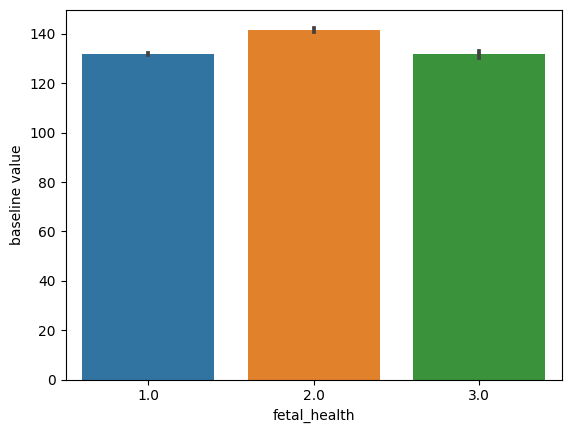

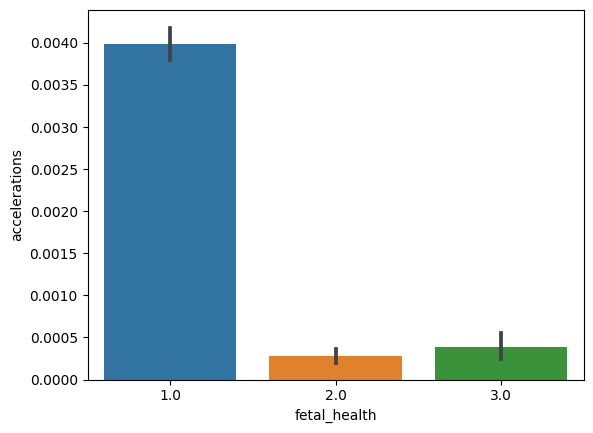

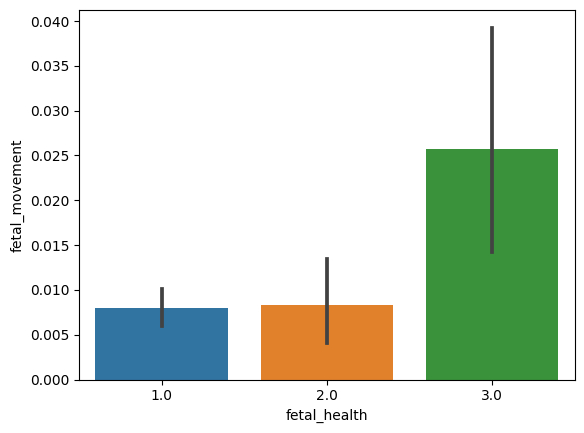

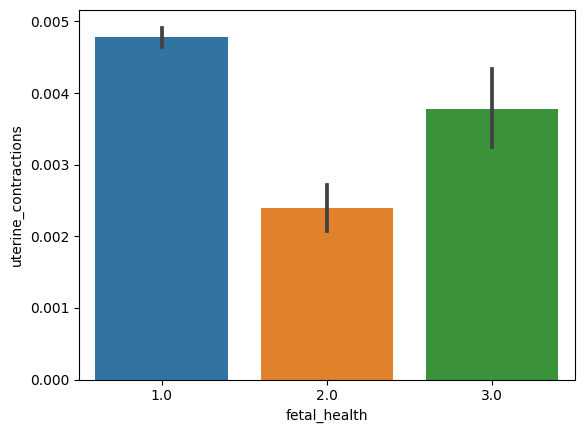

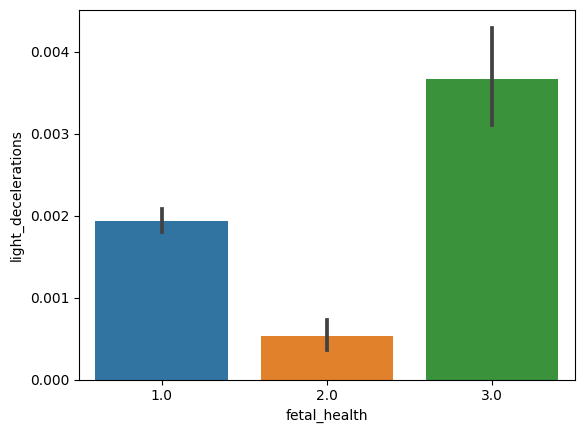

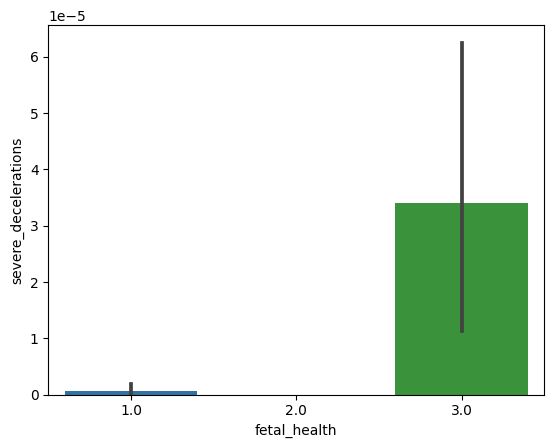

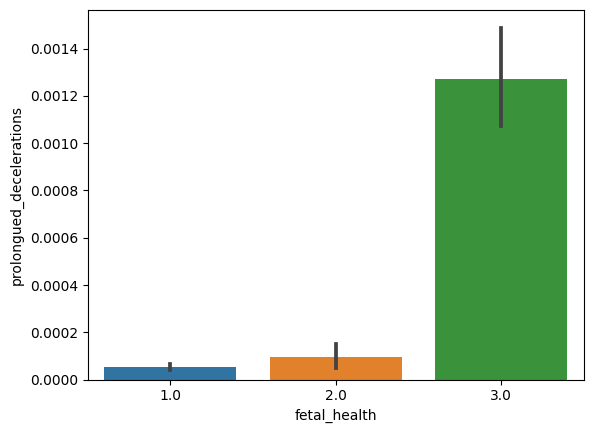

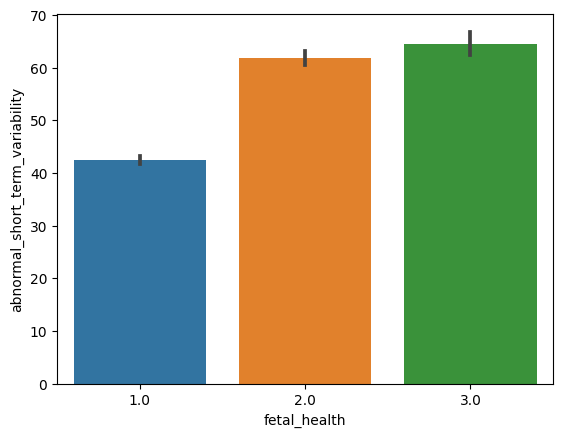

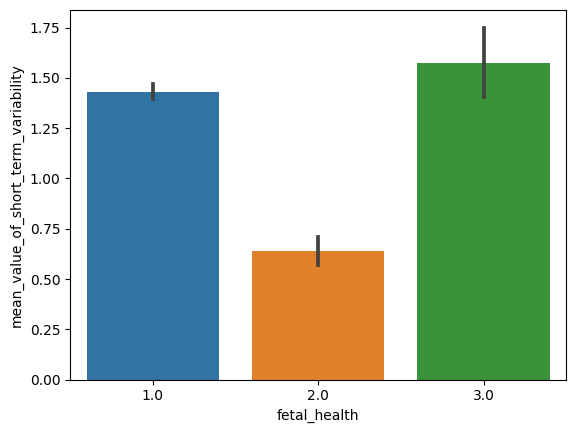

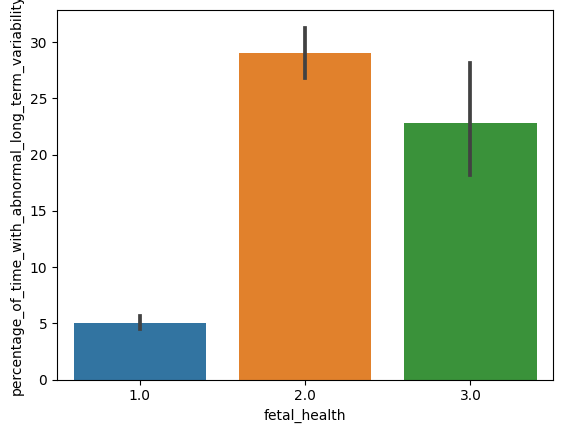

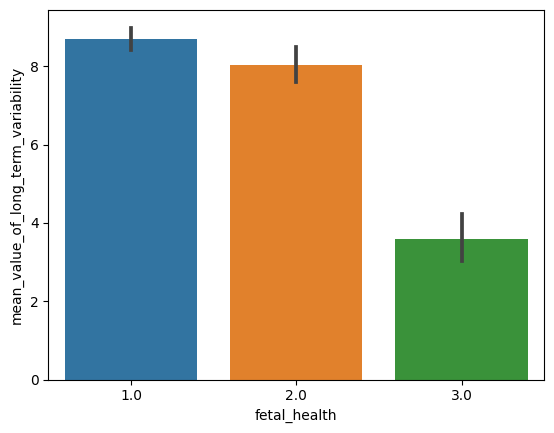

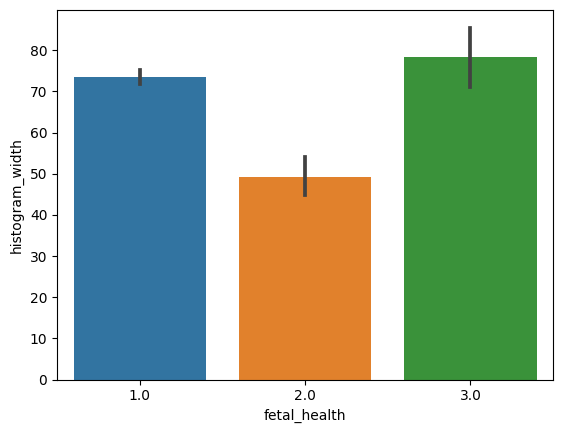

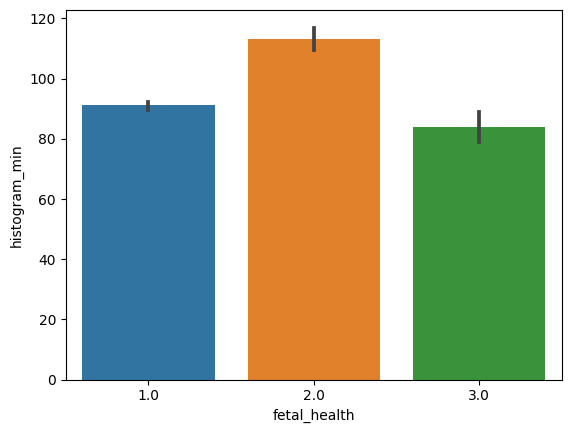

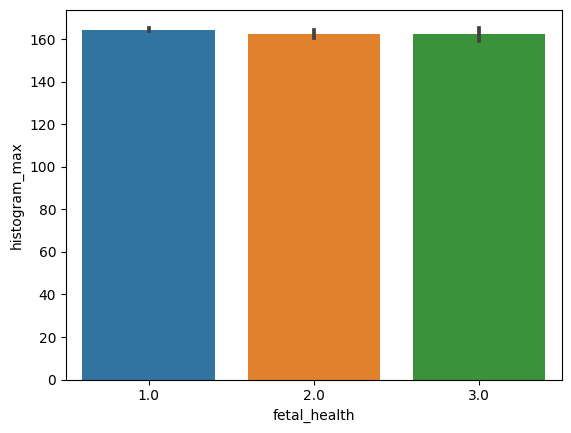

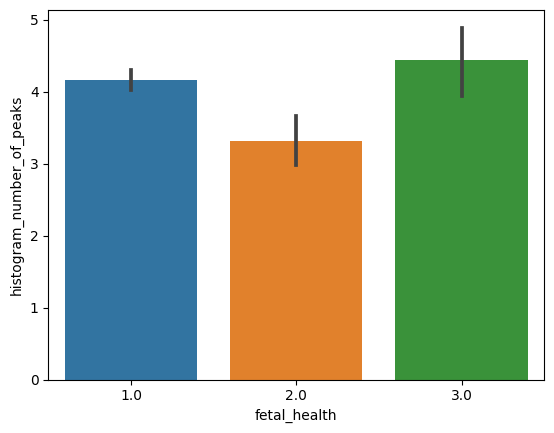

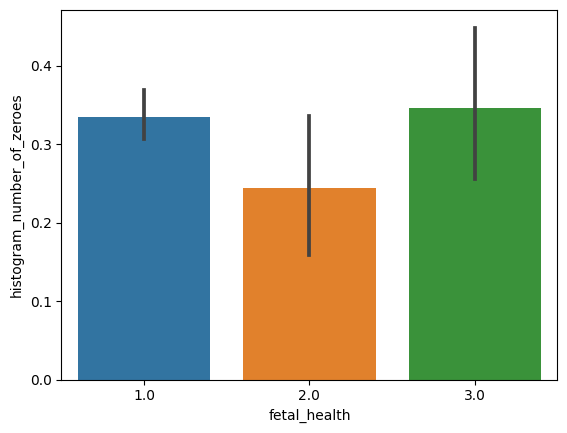

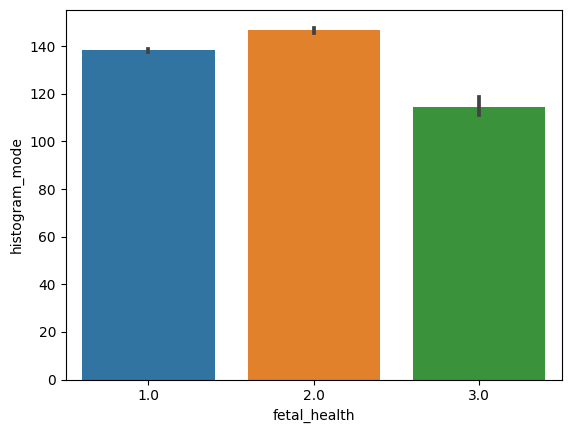

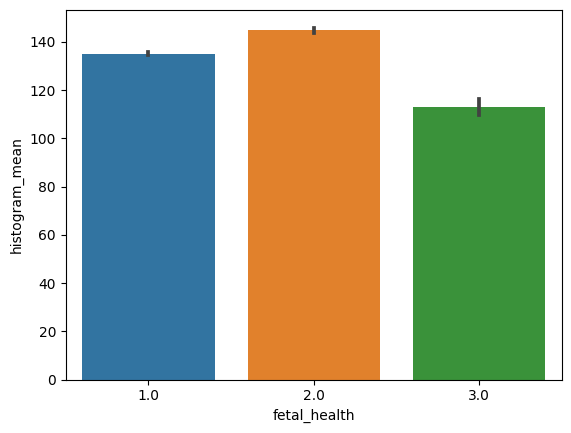

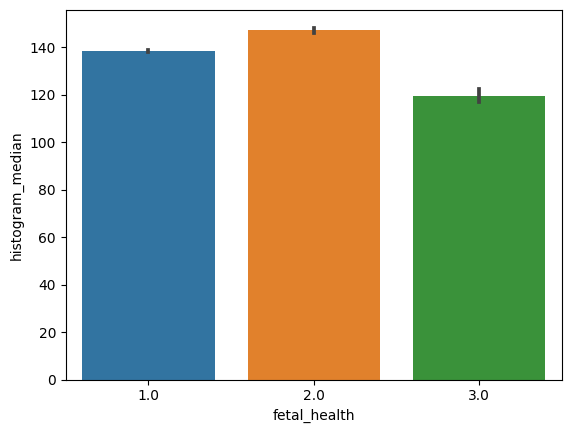

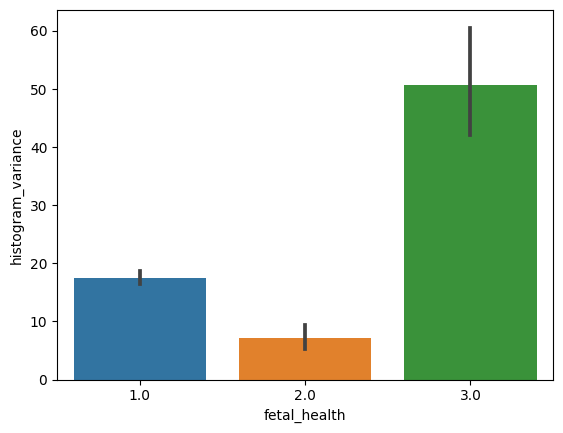

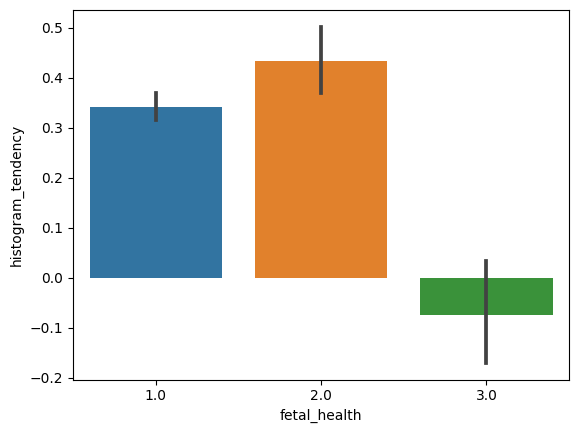

In [ ]:
for col in data.columns:
        if (col== "fetal_health"): break
        sns.barplot(data, y=data[col],x="fetal_health")
        plt.show()

TASK- 2

1. Data Preprocessing (as per requirement)
2. Feature Engineering

Not really needed

3. Split dataset in train-test (80:20 ratio)

In [ ]:
X = data.drop('fetal_health',axis=1)

In [ ]:
Y=data['fetal_health']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state = 42)

In [ ]:
X_train.shape, Y_train.shape

((1700, 21), (1700,))

In [ ]:
X_test.shape, Y_test.shape

((426, 21), (426,))

4. Model selection

In [ ]:
from sklearn.linear_model import LogisticRegression

5. Model training

In [ ]:
model = LogisticRegression()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, Y_train)

LogisticRegression()

6. Model evaluation
7. Fine tuning the model
8. Make predictions

In [ ]:
model.score(X_train_scaled, Y_train)

0.9070588235294118

In [ ]:
model.score(X_test_scaled, Y_test)

0.8779342723004695

In [ ]:
Y_pred = model.predict(X_test_scaled)
Y_pred
#where, 1- Normal, 2-Suspect, 3-Pathological

array([1., 1., 1., 1., 1., 3., 1., 3., 1., 2., 1., 3., 1., 1., 1., 2., 1.,
       1., 2., 1., 1., 1., 3., 1., 1., 3., 3., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 3., 3., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
       1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 2., 3., 1., 1., 2., 2., 1., 2., 1.,
       1., 2., 1., 2., 1., 1., 3., 2., 2., 2., 1., 2., 1., 3., 1., 1., 2.,
       3., 1., 1., 1., 1., 1., 3., 3., 1., 1., 1., 3., 1., 1., 1., 2., 1.,
       1., 1., 2., 2., 2., 1., 3., 1., 3., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 3., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
Y_test

282     1.0
1999    1.0
1709    1.0
988     1.0
2018    1.0
       ... 
305     2.0
973     1.0
611     1.0
2108    1.0
192     2.0
Name: fetal_health, Length: 426, dtype: float64

In [ ]:
print(accuracy_score(Y_test, Y_pred)*100)

87.79342723004694


In [ ]:
classification_report=classification_report(Y_test, Y_pred)
print(classification_report)

              precision    recall  f1-score   support

         1.0       0.94      0.93      0.94       333
         2.0       0.63      0.64      0.64        64
         3.0       0.73      0.76      0.75        29

    accuracy                           0.88       426
   macro avg       0.77      0.78      0.77       426
weighted avg       0.88      0.88      0.88       426



So we can see the accuracy for the Logistic Regression model for classification of the health of a fetus as Normal, Suspect or Pathological using CTG data, is 87.79%. The accuracy for KNN model is a little less, 87.32% shown below. We can visualize the above classification with the graph below.

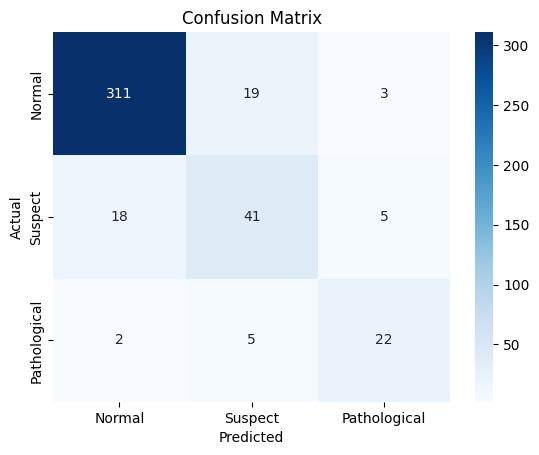

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plotting the confusion matrix
labels = ['Normal', 'Suspect', 'Pathological']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
model.predict(X_test)

array([1., 1., 1., 1., 1., 3., 1., 3., 2., 2., 1., 3., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 3., 1., 1., 3., 3., 2., 1., 1., 2., 1., 1., 2.,
       1., 1., 1., 3., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1.,
       1., 1., 1., 2., 1., 1., 3., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1.,
       2., 1., 2., 1., 1., 1., 1., 3., 1., 1., 1., 3., 1., 1., 1., 2., 1.,
       1., 1., 2., 2., 2., 1., 2., 1., 3., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 3., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 1., 1., 1., 1.

In [ ]:
Y_test

282     1.0
1999    1.0
1709    1.0
988     1.0
2018    1.0
       ... 
305     2.0
973     1.0
611     1.0
2108    1.0
192     2.0
Name: fetal_health, Length: 426, dtype: float64

In [ ]:
model.score(X_train, Y_train)

0.9241176470588235

In [ ]:
model.score(X_test, Y_test)

0.8732394366197183

In [ ]:
print(accuracy_score(Y_test, model.predict(X_test))*100)

87.32394366197182
